## By using BigMart Sales data 
##### Create a simple algorithm to predict the sales, how many products are being sold daily, predict the sales of that product on a weekly or monthly basis and discover how many sales of a particular product hapened in a year in their sales report released in 2013.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm

In [2]:
# Loading the data
data = pd.read_csv("E:\Machine Learning Bootcamp\Datasets\BigData Sales.csv")

In [3]:
# Extracting the independent and dependent variables
x = data.iloc[:,:-1].values
y = data.iloc[:,4].values

In [4]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Unnamed: 12,Date
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,NaN,2/5/2010
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,NaN,2/12/2010
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,NaN,2/19/2010
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,NaN,2/26/2010
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NaN,3/5/2010


<AxesSubplot:>

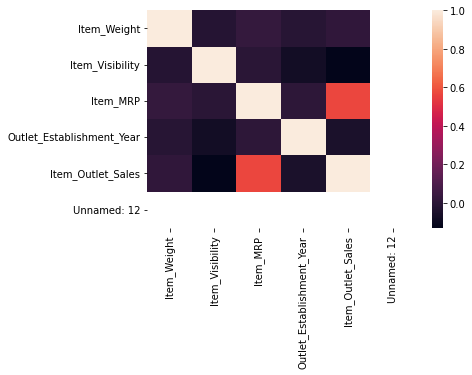

In [5]:
# Data visualization
# Building the correlation matrix
sns.heatmap(data.corr())

In [6]:
# Encode categorical variables
encoder = LabelEncoder()
data["Item_Type"] = encoder.fit_transform(data["Item_Type"])
data["Outlet_Location_Type"] = encoder.fit_transform(data["Outlet_Location_Type"])

In [7]:
# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    data.drop(["Item_Outlet_Sales"], axis=1), data["Item_Outlet_Sales"], test_size=0.2)

In [8]:
# Rows and columns
print(f'Training Dataset (row, col): {data.shape}')

Training Dataset (row, col): (8523, 14)


In [9]:
# Preprocess the data
data = data.dropna()

In [10]:
data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            0 non-null      object 
 1   Item_Weight                0 non-null      float64
 2   Item_Fat_Content           0 non-null      object 
 3   Item_Visibility            0 non-null      float64
 4   Item_Type                  0 non-null      int32  
 5   Item_MRP                   0 non-null      float64
 6   Outlet_Identifier          0 non-null      object 
 7   Outlet_Establishment_Year  0 non-null      int64  
 8   Outlet_Size                0 non-null      object 
 9   Outlet_Location_Type       0 non-null      int32  
 10  Outlet_Type                0 non-null      object 
 11  Item_Outlet_Sales          0 non-null      float64
 12  Unnamed: 12                0 non-null      float64
 13  Date                       0 non-null      object 
dtypes: flo

In [11]:
# Summary of Dataset Train
data.describe(include=[object, np.number])

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Unnamed: 12,Date
count,0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0,0.0,0
unique,0,NaN,0,NaN,NaN,NaN,0,NaN,0,NaN,0,NaN,NaN,0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Checking missing Values
print('Missing Values by Count: \n\n',
      data.isnull().sum().sort_values(ascending=False),'\n\nMissing Values by %:\n\n',
      data.isnull().sum().sort_values(ascending=False)/data.shape[0] * 100)

Missing Values by Count: 

 Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
Unnamed: 12                  0.0
Date                         0.0
dtype: float64 

Missing Values by %:

 Item_Identifier             NaN
Item_Weight                 NaN
Item_Fat_Content            NaN
Item_Visibility             NaN
Item_Type                   NaN
Item_MRP                    NaN
Outlet_Identifier           NaN
Outlet_Establishment_Year   NaN
Outlet_Size                 NaN
Outlet_Location_Type        NaN
Outlet_Type                 NaN
Item_Outlet_Sales           NaN
Unnamed: 12                 NaN
Date                        NaN
dtype: float64


##### Finding how many products are being sold daily

In [13]:
# Grouping the data by the date and sum the sales
daily_sales = data.groupby("Date").sum()["Item_Outlet_Sales"]
# Print the daily sales
print(daily_sales)

Series([], Name: Item_Outlet_Sales, dtype: float64)


##### Predicting the sales of that product on a weekly or monthly basis

In [19]:
# Convert the date index to a datetime index
sales.index = pd.to_datetime(sales.index)

# Resample the data to weekly or monthly frequency
if frequency == "weekly":
    sales = sales.resample("W").sum()
elif frequency == "monthly":
    sales = sales.resample("M").sum()

# Fit the Exponential Smoothing model
model = sm.tsa.ExponentialSmoothing(sales).fit()

# Make predictions for the next N periods
predictions = model.forecast(steps=N)

# Print the predictions
print(predictions)

NameError: name 'sales' is not defined

##### Discovering how many sales of a particular product happened in a year in their sales report

In [18]:
# Filter the data for the desired product
product_data = data[data["Item_Identifier"] == product_id]

# Convert the date column to a datetime type
product_data["Date"] = pd.to_datetime(product_data["Date"])

# Extract the year from the date column
product_data["Year"] = product_data["Date"].dt.year

# Group the data by the year and sum the sales
sales_by_year = product_data.groupby("Year").sum()["Item_Outlet_Sales"]

NameError: name 'product_id' is not defined

##### Training the dataset

In [14]:
# Filter the data for the desired product
product_data = data[data["Item_Identifier"] == product_id]

# Extract the features and target
X = product_data.drop("Item_Outlet_Sales", axis=1)
y = product_data["Item_Outlet_Sales"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model on the test data
score = model.score(X_test, y_test)

# Print the R^2 score
print("R^2 score:", score)


NameError: name 'product_id' is not defined